In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib as mpl
import sys
sys.path.append("..")

from pc import PC


In [2]:
mutua_data = np.loadtxt("data/mutualism.csv", delimiter=",")
compe_data = np.loadtxt("data/competition.csv", delimiter=",")


In [3]:
S = 20
x, y = mutua_data


In [6]:
pc = PC(x, y, lib_size=[5, 200, 5], p=1)
res = pc.pc()


In [ ]:
def get_causality_series(x, y):
    L = mutua_data.shape[1]
    corr = np.zeros(int((L - S) / 5))
    pattern_causality = np.zeros((2, int((L - S) / 5), 3))
    i = 0
    for t in np.arange(S, L, 5):
        corr[i] = stats.pearsonr(x[:t], y[:t]).statistic
        pc = PC(x[:t], y[:t], p=1)

        pattern_causality[:, i, :] = pc.calc() / pc.L
        i += 1

    return corr, pattern_causality


In [ ]:
m_corr, m_cause = get_causality_series(*mutua_data)


In [ ]:
c_corr, c_cause = get_causality_series(*compe_data)


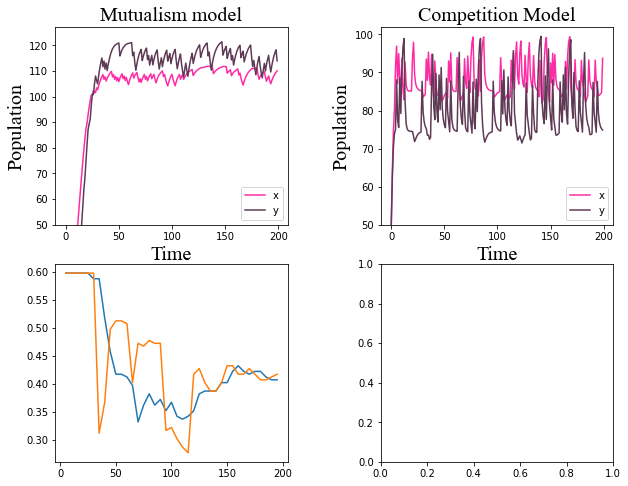

In [16]:
font = mpl.font_manager.FontProperties(
    'Times New Roman', size=20, weight=500)  # 指定字体

fig, axe = plt.subplots(2, 2, figsize=(10, 8))

axe[0][0].plot(mutua_data[0], label='x', color="#fe2ca4")
axe[0][0].plot(mutua_data[1], label='y', color="#5e3a55")
axe[0][1].plot(compe_data[0], label='x', color="#fe2ca4")
axe[0][1].plot(compe_data[1], label='y', color="#5e3a55")


axe[0][0].set_ylim(50, None)
axe[0][1].set_ylim(50, None)
axe[0][0].set_title('Mutualism model', font=font)
axe[0][1].set_title('Competition Model', font=font)
axe[0][0].set_ylabel('Population', font=font)
axe[0][1].set_ylabel('Population', font=font)
axe[0][0].set_xlabel('Time', font=font)
axe[0][1].set_xlabel('Time', font=font)

axe[0][1].legend()
axe[0][0].legend()

ix = np.arange(5,200,5)
axe[1][0].plot(ix, res[0,:,0] / pc.L)
axe[1][0].plot(ix, res[1,:,0] / pc.L)

fig.subplots_adjust(wspace=0.4)

In [19]:
res

array([[[119.,  33.,   0.],
        [119.,  33.,   0.],
        [119.,  33.,   0.],
        [119.,  33.,   0.],
        [119.,  33.,   0.],
        [117.,  32.,   0.],
        [117.,  33.,   0.],
        [103.,  35.,   0.],
        [ 91.,  33.,   0.],
        [ 83.,  31.,   0.],
        [ 83.,  34.,   0.],
        [ 82.,  36.,   0.],
        [ 79.,  43.,   0.],
        [ 66.,  49.,   0.],
        [ 72.,  49.,   0.],
        [ 76.,  47.,   0.],
        [ 72.,  51.,   0.],
        [ 74.,  52.,   0.],
        [ 70.,  54.,   0.],
        [ 73.,  51.,   0.],
        [ 68.,  55.,   0.],
        [ 67.,  54.,   0.],
        [ 68.,  50.,   0.],
        [ 70.,  48.,   0.],
        [ 76.,  47.,   0.],
        [ 77.,  47.,   0.],
        [ 77.,  47.,   0.],
        [ 77.,  46.,   0.],
        [ 80.,  45.,   0.],
        [ 80.,  45.,   0.],
        [ 84.,  44.,   0.],
        [ 86.,  44.,   0.],
        [ 84.,  41.,   0.],
        [ 83.,  41.,   0.],
        [ 84.,  42.,   0.],
        [ 84.,  42.,

NameError: name 'ix' is not defined

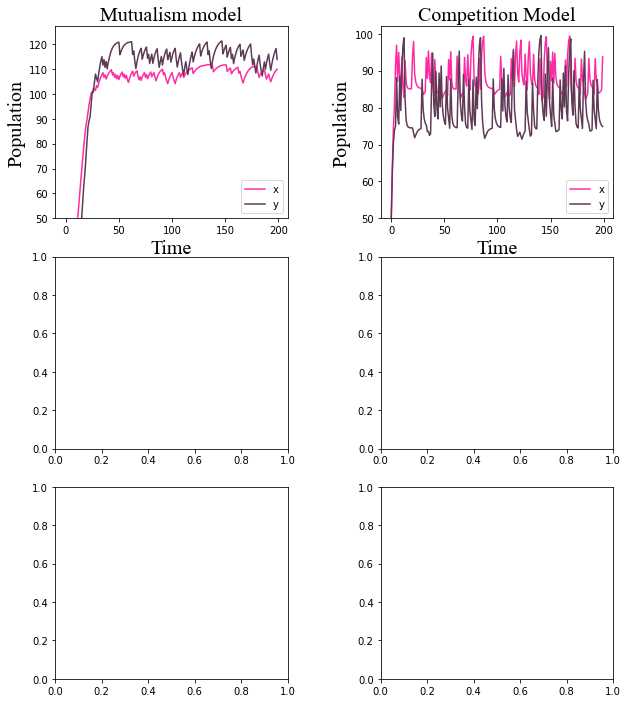

In [10]:
font = mpl.font_manager.FontProperties(
    'Times New Roman', size=20, weight=500)  # 指定字体

fig, axe = plt.subplots(3, 2, figsize=(10, 12))

axe[0][0].plot(mutua_data[0], label='x', color="#fe2ca4")
axe[0][0].plot(mutua_data[1], label='y', color="#5e3a55")
axe[0][1].plot(compe_data[0], label='x', color="#fe2ca4")
axe[0][1].plot(compe_data[1], label='y', color="#5e3a55")


axe[0][0].set_ylim(50, None)
axe[0][1].set_ylim(50, None)
axe[0][0].set_title('Mutualism model', font=font)
axe[0][1].set_title('Competition Model', font=font)
axe[0][0].set_ylabel('Population', font=font)
axe[0][1].set_ylabel('Population', font=font)
axe[0][0].set_xlabel('Time', font=font)
axe[0][1].set_xlabel('Time', font=font)

axe[0][1].legend()
axe[0][0].legend()

fig.subplots_adjust(wspace=0.4)
axe[1][0].plot(ix, m_corr, color="#f8cd05")
# axe[1][0].set_title('Mutualism model', font=font)
# axe[1][1].set_title('Competition Model', font=font)
axe[1][0].set_ylabel('Correlation coef.', font=font)
axe[1][0].set_xlabel('L', font=font)
axe[1][1].plot(ix, c_corr, color="#f8cd05")
axe[1][1].set_ylabel('Correlation coef.', font=font)
axe[1][1].set_xlabel('L', font=font)
axe[1][0].set_ylim(0, 1.1)

# axe[1][0].legend()
# axe[1][1].legend()

axe[2][0].plot(ix, res[0, :, 0], color='#1c39bb',
               label="X causes Y (positive)")
axe[2][0].plot(ix, res[1, :, 0], color='#50c878',
               label="Y causes X (positive)")

axe[2][1].plot(ix, res[0, :, 1], color="#c81d11",
               label="X causes Y (negative)")
axe[2][1].plot(ix, res[1, :, 1], color="#ffbf00",
               label="X causes Y (negative)")

# axe[2][0].set_title('Mutualism model', font=font)
axe[2][0].set_ylabel('Causality Strength', font=font)
axe[2][0].set_xlabel('L', font=font)
# axe[2][1].set_title('Competition Model', font=font)
axe[2][1].set_ylabel('Causality Strength', font=font)
axe[2][1].set_xlabel('L', font=font)

axe[2][0].legend()
axe[2][1].legend()

plt.savefig("output.svg", format="svg")

plt.show()


In [ ]:
a = np.array([[1],[3],[5],[7]])
a

array([[1],
       [3],
       [5],
       [7]])

In [ ]:
b = np.array([[0, 1], [1, 1], [2, 1], [3, 1]])


In [ ]:
w = np.array([[0.2, .8], [.4, .6], [1, 0], [0, 1]])


In [ ]:
print(a[b])
print(w)

[[[1]
  [3]]

 [[3]
  [3]]

 [[5]
  [3]]

 [[7]
  [3]]]
[[0.2 0.8]
 [0.4 0.6]
 [1.  0. ]
 [0.  1. ]]


In [ ]:
w

array([[0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ]])

In [ ]:
np.tile(w, 3) 

array([[0.2, 0.8, 0.2, 0.8, 0.2, 0.8],
       [0.4, 0.6, 0.4, 0.6, 0.4, 0.6],
       [1. , 0. , 1. , 0. , 1. , 0. ],
       [0. , 1. , 0. , 1. , 0. , 1. ]])

In [45]:
np.repeat(w[:, :, None], 2, axis=2)


array([[[0.2, 0.2],
        [0.8, 0.8]],

       [[0.4, 0.4],
        [0.6, 0.6]],

       [[1. , 1. ],
        [0. , 0. ]],

       [[0. , 0. ],
        [1. , 1. ]]])

In [20]:
print(a[b].shape, w.shape)

(4, 2, 1) (4, 2)


In [21]:
a[b] @ w

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)